Assignment 3 (due on 11/22)

Student：吕嘉杰（12331300），Gtihub：lyujiajie

批改人：赵淑慧

得分：38/60

# PS1. Niño 3.4 index
15/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。——距平计算有误，不是以28为参考值，而是climatology。8/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——距平计算有误，没有计算3个月的滑动平均，图片缺少图例。7/10

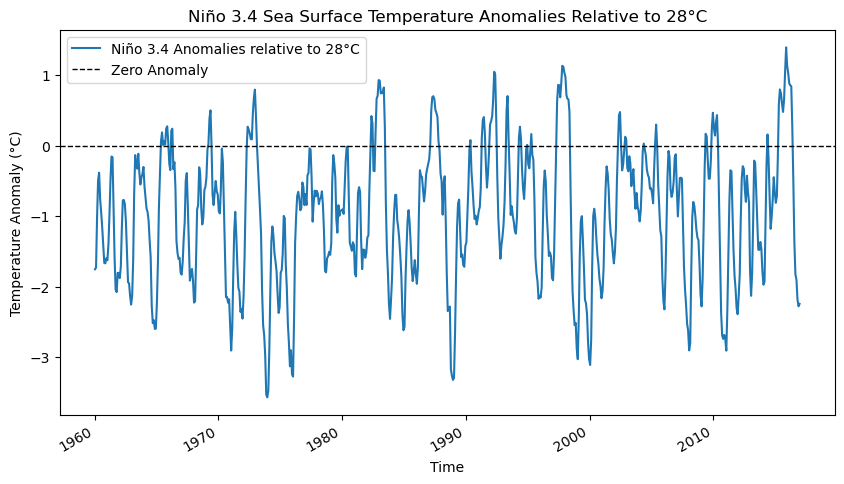

In [5]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc")

nino34_region = ds['sst'].sel(lat=slice(-5, 5), lon=slice(190, 240))

climatology = nino34_region.groupby('time.month').mean(dim='time')

anomalies_relative_to_28 = nino34_region - 28
ds.close()

plt.figure(figsize=(10, 5))
anomalies_relative_to_28.mean(dim=['lat', 'lon']).plot(label='Niño 3.4 Anomalies relative to 28°C')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Anomaly')
plt.title('Niño 3.4 Sea Surface Temperature Anomalies Relative to 28°C')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show() 

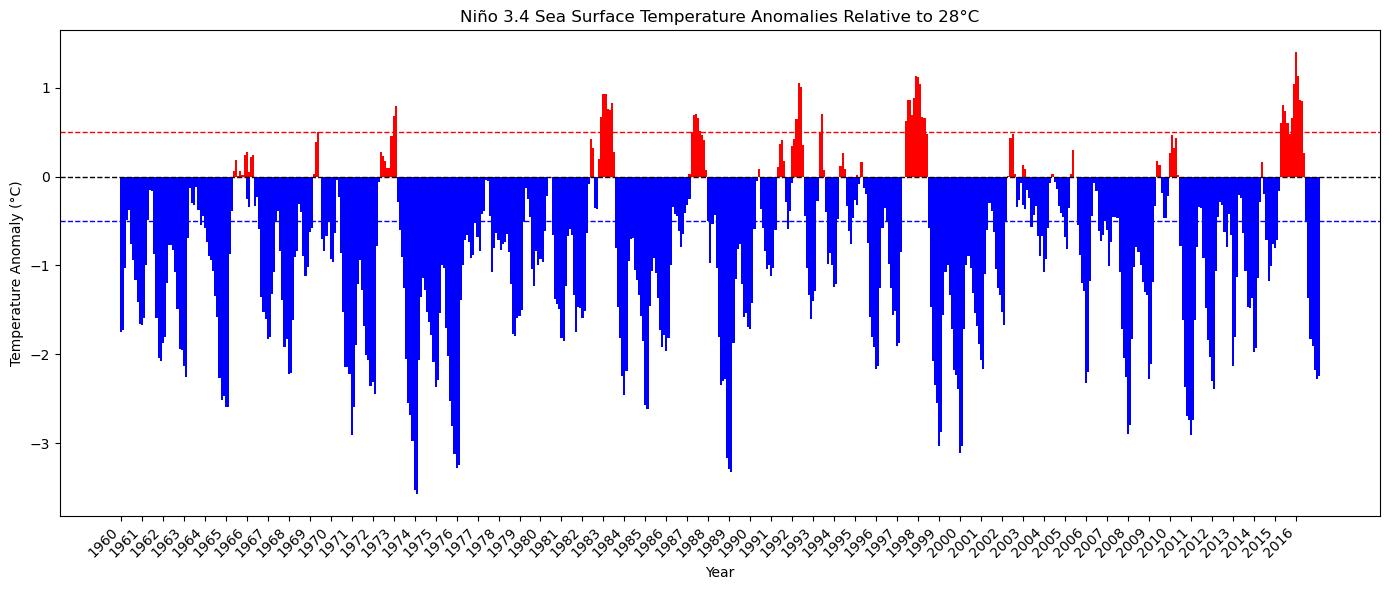

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc")

nino34_region = ds['sst'].sel(lat=slice(-5, 5), lon=slice(190, 240))

climatology = nino34_region.groupby('time.month').mean(dim='time')

anomalies_relative_to_28 = nino34_region - 28

ds.close()

mean_anomalies_df = anomalies_relative_to_28.mean(dim=['lat', 'lon']).to_dataframe(name='Temperature Anomaly (°C)')

mean_anomalies_df['Year'] = mean_anomalies_df.index.year
mean_anomalies_df['Month'] = mean_anomalies_df.index.month

mean_anomalies_pivot = mean_anomalies_df.pivot_table(values='Temperature Anomaly (°C)', index='Year', columns='Month')

fig, ax = plt.subplots(figsize=(14, 6))

colors = np.where(mean_anomalies_pivot > 0, 'red', 'blue')

bar_width = 0.1
for i, (colname, color) in enumerate(zip(mean_anomalies_pivot.columns, colors.T)):
    bars = ax.bar(mean_anomalies_pivot.index.astype(int) + i * bar_width, mean_anomalies_pivot[colname], width=bar_width, color=color, label=colname)

plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='Positive 0.5 Anomaly')
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=1, label='Negative 0.5 Anomaly')

plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Anomaly')
plt.title('Niño 3.4 Sea Surface Temperature Anomalies Relative to 28°C')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(mean_anomalies_pivot.index.astype(int), rotation=45, ha='right')
plt.tight_layout()
plt.show()


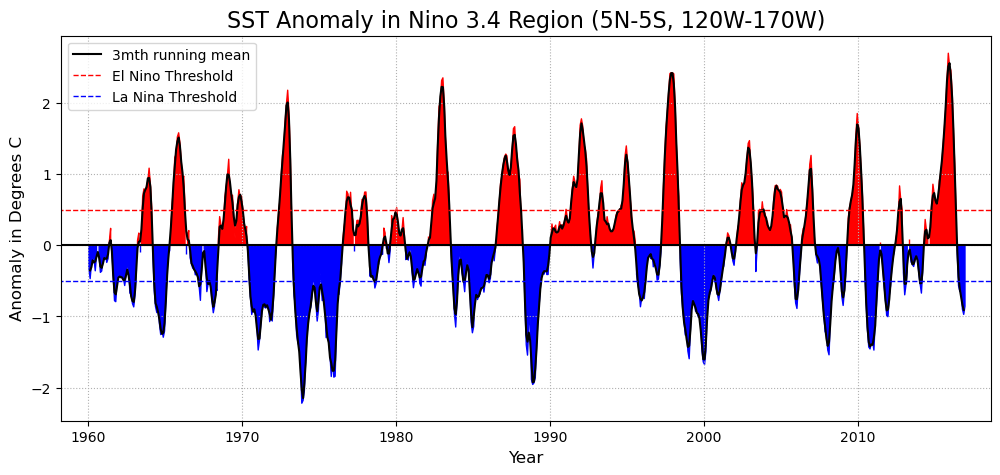

In [12]:
# 参考代码
# 1.1
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds_nino = ds.sel(lat=slice(-5,5), lon=slice(190,240)).mean(dim=['lat','lon'])
ds_nino_monthly_climatology=ds_nino.groupby('time.month').mean('time')
# ds_nino_monthly_climatology
ds_nino_anomaly=(ds_nino.groupby('time.month')-ds_nino_monthly_climatology).sst
# 1.2
nino34=ds_nino_anomaly.rolling(time=3,center=True).mean()
fig, ax = plt.subplots(1,1,figsize=(12,5))
x=nino34.time
ax.plot(x,nino34,c='k',label='3mth running mean')
ax.fill_between(x,ds_nino_anomaly,where=(ds_nino_anomaly>0),color='r')
ax.fill_between(x,ds_nino_anomaly,where=(ds_nino_anomaly<0),color='b')
foo = plt.xticks()
ax.hlines(xmin=foo[0].min(),xmax=foo[0].max(),y=0,color='k')
ax.hlines(xmin=foo[0].min(),xmax=foo[0].max(),y=0.5,color='r',label='El Nino Threshold',ls='--',lw=1)
ax.hlines(xmin=foo[0].min(),xmax=foo[0].max(),y=-0.5,color='b',label='La Nina Threshold',ls='--',lw=1)
ax.set_xlim(foo[0].min()+3000,foo[0].max()-500,)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Anomaly in Degrees C',fontsize=12)
ax.set_title('SST Anomaly in Nino 3.4 Region (5N-5S, 120W-170W)',fontsize=16)
plt.grid(ls=':')
plt.legend()
plt.show()

# PS2. Earth’s energy budget
15/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——没有画出和数据提供的TOA净通量的对比，TOA净通量实际等于太阳辐射减去短波和长波之和；图中没有标明变量单位。3/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——完成了权重计算，但进一步计算有误，得到的结果与题目的图片不相符，见参考代码；最好给出文字性解释。5/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——题目要求得到辐射总量，不应简单根据lon来sum，而应计算实际的格网面积并乘算再加和，见参考代码。3/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——未画完高云区的出射短波和长波辐射图；图片没有图例/颜色带，没有标明变量单位；缺少横纵坐标标签。2/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——面积相关的计算错误与2.2相同，见参考代码；没有文字性解释以回答问题。2/5

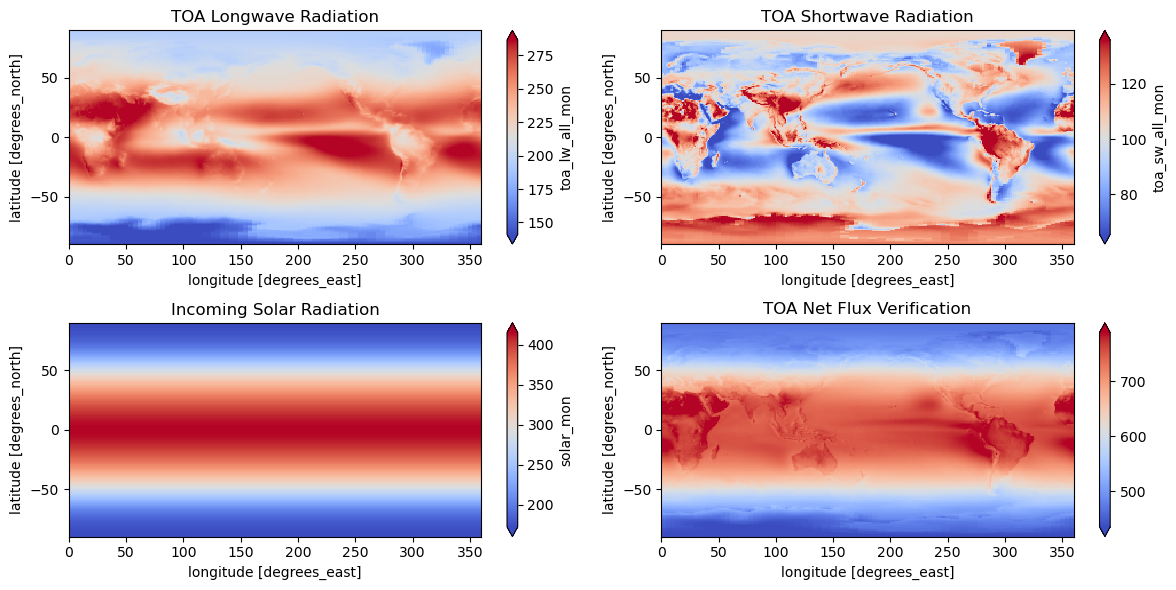

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc"
data = xr.open_dataset(file_path)

toalw_mean = data['toa_lw_all_mon'].mean(dim='time')
toasw_mean = data['toa_sw_all_mon'].mean(dim='time')
solar_mean = data['solar_mon'].mean(dim='time')

net_flux_verification = toalw_mean + toasw_mean + solar_mean
net_flux = data['toa_net_all_mon'].mean(dim='time')

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
toalw_mean.plot(cmap='coolwarm', robust=True)
plt.title('TOA Longwave Radiation')

plt.subplot(2, 2, 2)
toasw_mean.plot(cmap='coolwarm', robust=True)
plt.title('TOA Shortwave Radiation')

plt.subplot(2, 2, 3)
solar_mean.plot(cmap='coolwarm', robust=True)
plt.title('Incoming Solar Radiation')

plt.subplot(2, 2, 4)
net_flux_verification.plot(cmap='coolwarm', robust=True)
plt.title('TOA Net Flux Verification')

plt.tight_layout()
plt.show()

In [35]:
ds = xr.open_dataset(file_path) # TA added

area_weights = np.cos(np.radians(ds['lat'])) 

toa_incoming_solar = (ds['solar_mon'] * area_weights).sum(dim=['lat', 'lon']) / area_weights.sum()

toa_incoming_solar = (ds['solar_mon'].mean(dim='time').weighted(area_weights)).mean(dim=['lat', 'lon']) # TA corrected
# It should approximately match up with the cartoon, that is 340.4 W/m^2 incoming solar radiation
# The following should be 239.9 W/m^2 total outgoing infrared radiation and 99.9 W/m^2 total reflected solar radiation.

toa_outgoing_lw = (ds['toa_lw_all_mon'] * area_weights).sum(dim=['lat', 'lon']) / area_weights.sum()
toa_outgoing_sw = (ds['toa_sw_all_mon'] * area_weights).sum(dim=['lat', 'lon']) / area_weights.sum()

print(toa_incoming_solar,toa_outgoing_lw,toa_outgoing_sw) # TA added

tolerance = 1e-4 
assert np.all(np.abs(diff) < tolerance), f"Differences exceed tolerance: {diff}"

<xarray.DataArray 'solar_mon' ()>
array(340.28354, dtype=float32) <xarray.DataArray (time: 203)>
array([85747.31 , 85688.51 , 86721.07 , 87604.586, 87852.41 , 87735.75 ,
       87231.45 , 85992.27 , 85349.58 , 85279.625, 85286.03 , 85233.21 ,
       85317.086, 85808.62 , 86831.39 , 87315.26 , 87964.02 , 88112.98 ,
       87140.41 , 86261.83 , 85759.37 , 85350.875, 85345.23 , 85650.92 ,
       85626.305, 86181.36 , 87085.484, 87606.67 , 88167.766, 88050.1  ,
       87543.016, 86422.13 , 85644.9  , 85293.266, 85673.14 , 85718.42 ,
       86014.95 , 86060.45 , 86755.516, 87568.53 , 88079.836, 87937.29 ,
       87423.47 , 86679.63 , 85754.15 , 85567.19 , 85312.73 , 85717.16 ,
       85688.44 , 86006.54 , 86638.47 , 87592.23 , 87766.74 , 87974.32 ,
       87309.03 , 86605.24 , 85635.97 , 85204.56 , 85528.42 , 85783.164,
       85723.88 , 86128.305, 86403.33 , 87517.33 , 88126.67 , 88029.516,
       87414.016, 86630.08 , 85814.09 , 85444.875, 85093.19 , 85387.1  ,
       85688.7  , 85714.78 

NameError: name 'diff' is not defined

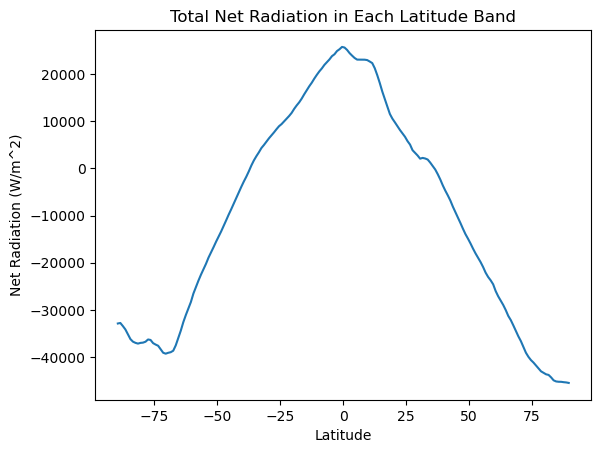

In [36]:
net_radiation_lat_band = data['toa_net_all_mon'].mean(dim='time').sum(dim='lon')
net_radiation_lat_band.plot()
plt.title('Total Net Radiation in Each Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (W/m^2)')
plt.show()

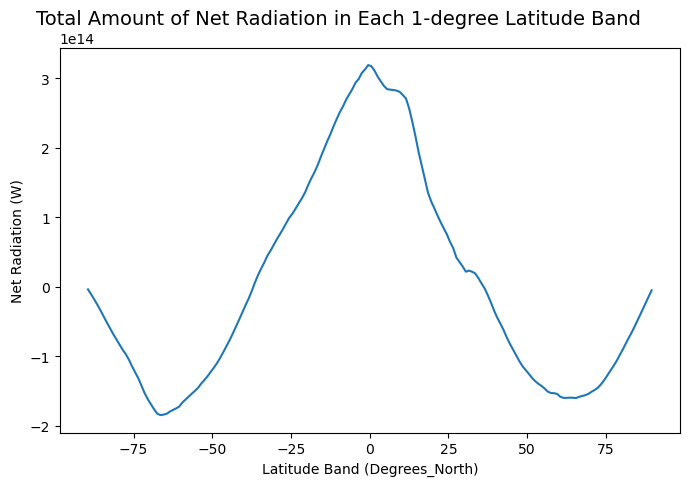

In [37]:
# 2.3参考代码
"""
Area calculations: https://seaflux.readthedocs.io/en/stable/_modules/pyseaflux/area.html
-----------------
Calculates the area of pixels for a give grid input.
"""
def earth_radius(lat):
    """Calculate the radius of the earth for a given latitude

    Args:
        lat (array, float): latitude value (-90 : 90)

    Returns:
        array: radius in metres
    """
    from numpy import cos, deg2rad, sin

    lat = deg2rad(lat)
    a = 6378137
    b = 6356752
    r = (
        ((a ** 2 * cos(lat)) ** 2 + (b ** 2 * sin(lat)) ** 2)
        / ((a * cos(lat)) ** 2 + (b * sin(lat)) ** 2)
    ) ** 0.5

    return r
def area_grid(lat, lon, return_dataarray=False):
    """Calculate the area of each grid cell for given lats and lons

    Args:
        lat (array): latitudes in decimal degrees of length N
        lon (array): longitudes in decimal degrees of length M
        return_dataarray (bool, optional): if True returns xr.DataArray, else array

    Returns:
        array, xr.DataArray: area of each grid cell in meters

    References:
        https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid

    ylat, xlon = meshgrid(lat, lon)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=1))
    dlon = deg2rad(gradient(xlon, axis=0))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    if not return_dataarray:
        return area
    else:
        from xarray import DataArray

        xda = DataArray(
            area.T,
            dims=["lat", "lon"],
            coords={"lat": lat, "lon": lon},
            attrs=dict(
                long_name="Area per pixel",
                units="m^2",
                description=(
                    "Area per pixel as calculated by pySeaFlux. The non-"
                    "spherical shape of Earth is taken into account."
                ),
            ),
        )

        return xda
def get_area_from_dataset(dataarray, lat_name="lat", lon_name="lon"):
    """
    Calculate the grid cell area from a xr.Dataset or xr.DataArray.
    """
    da = dataarray
    x = da.lon.values
    y = da.lat.values

    area = area_grid(y, x, return_dataarray=True)

    return area
toa_net=data['toa_net_all_mon'].mean(dim='time')
area=get_area_from_dataset(toa_net)
net_rad_lat_band=(toa_net*area).sum(dim='lon')
plt.figure(111,figsize=(8,5))
plt.plot(net_rad_lat_band.lat,net_rad_lat_band)
plt.xlabel('Latitude Band (Degrees_North)')
plt.ylabel('Net Radiation (W)')
plt.title('Total Amount of Net Radiation in Each 1-degree Latitude Band',x=0.45,fontsize=14)
plt.show()

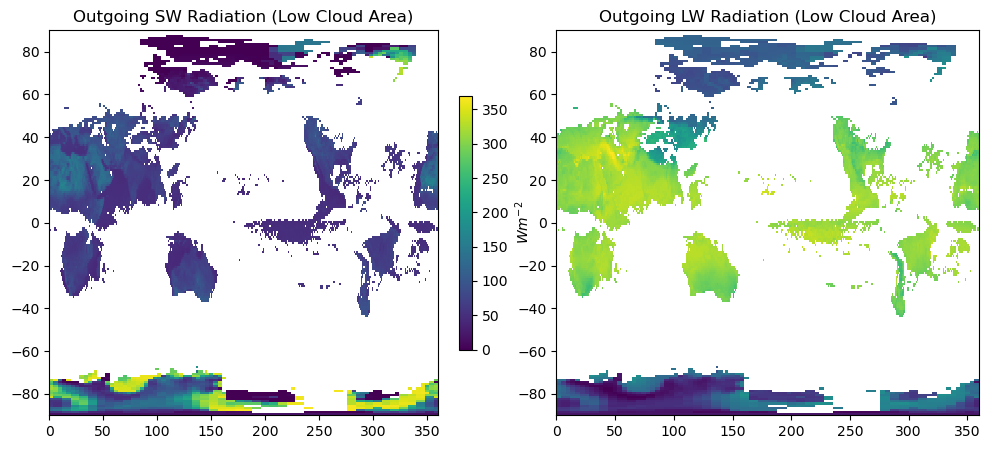

In [53]:
low_cloud_mask = ds['cldarea_total_daynight_mon'] <= 25
high_cloud_mask = ds['cldarea_total_daynight_mon'] >= 75

outgoing_sw_low = ds['toa_sw_all_mon'].where(low_cloud_mask).mean(dim='time')
outgoing_sw_high = ds['toa_sw_all_mon'].where(high_cloud_mask).mean(dim='time')

outgoing_lw_low = ds['toa_lw_all_mon'].where(low_cloud_mask).mean(dim='time')
outgoing_lw_high = ds['toa_lw_all_mon'].where(high_cloud_mask).mean(dim='time')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TA added colorbar and unit
f1=axes[0].pcolormesh(ds['lon'], ds['lat'], outgoing_sw_low, cmap='viridis')
cb=plt.colorbar(f1,fraction=0.03,shrink=0.7)
cb.set_label('${Wm^{-2}}$')
axes[0].set_title('Outgoing SW Radiation (Low Cloud Area)')


axes[1].pcolormesh(ds['lon'], ds['lat'], outgoing_lw_low, cmap='viridis')
axes[1].set_title('Outgoing LW Radiation (Low Cloud Area)')

plt.show()


In [105]:
global_mean_sw_low = (ds['toa_sw_all_mon'].where(low_cloud_mask) * area_weights).sum() / area_weights.sum()
global_mean_lw_low = (ds['toa_lw_all_mon'].where(low_cloud_mask) * area_weights).sum() / area_weights.sum()

global_mean_sw_high = (ds['toa_sw_all_mon'].where(high_cloud_mask) * area_weights).sum() / area_weights.sum()
global_mean_lw_high = (ds['toa_lw_all_mon'].where(high_cloud_mask) * area_weights).sum() / area_weights.sum()

print(f'Global Mean SW Radiation (Low Cloud): {global_mean_sw_low.values} W/m^2')
print(f'Global Mean LW Radiation (Low Cloud): {global_mean_lw_low.values} W/m^2')
print(f'Global Mean SW Radiation (High Cloud): {global_mean_sw_high.values} W/m^2')
print(f'Global Mean LW Radiation (High Cloud): {global_mean_lw_high.values} W/m^2')

Global Mean SW Radiation (Low Cloud): 289804.53125 W/m^2
Global Mean LW Radiation (Low Cloud): 891113.3125 W/m^2
Global Mean SW Radiation (High Cloud): 3567779.0 W/m^2
Global Mean LW Radiation (High Cloud): 7025346.0 W/m^2


In [54]:
# 2.5 参考代码
weights1 = np.cos(np.deg2rad(outgoing_lw_high.lat))
lc_mean_shortwave=outgoing_sw_low.weighted(weights1).mean()
hc_mean_shortwave=outgoing_sw_high.weighted(weights1).mean()
lc_mean_longwave=outgoing_lw_low.weighted(weights1).mean()
hc_mean_longwave=outgoing_lw_high.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} Wm-2 respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} Wm-2 respectively.')
print('In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 Wm-2 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 Wm-2 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


# PS3. Explore a netCDF dataset
8/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。——横纵坐标有歧义；没有标明变量单位；图名不应使用变量的缩写名称。4/5
2. 用该数据集绘制至少5种不同的图。图名不应使用变量的缩写名称，且部分图名不明确；没有标明变量单位。4/5

In [86]:
import xarray as xr

file_path = "CERES_EBAF-TOA_200003-201701.nc"
data = xr.open_dataset(file_path)

print("Variables (Keys):")
print(list(data.variables))

print("\nDate Range:")
print(data['time'].min().values, "to", data['time'].max().values)

data.close()

Variables (Keys):
['lon', 'toa_sw_all_mon', 'toa_lw_all_mon', 'toa_net_all_mon', 'toa_sw_clr_mon', 'toa_lw_clr_mon', 'toa_net_clr_mon', 'toa_cre_sw_mon', 'toa_cre_lw_mon', 'toa_cre_net_mon', 'solar_mon', 'cldarea_total_daynight_mon', 'cldpress_total_daynight_mon', 'cldtemp_total_daynight_mon', 'cldtau_total_day_mon', 'time', 'lat']

Date Range:
2000-03-15T00:00:00.000000000 to 2017-01-15T00:00:00.000000000


In [96]:
print(data)

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 57.13 57.13 ... 0.0
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_

In [107]:
import xarray as xr

file_path = "pr_2021_YM.nc"
data = xr.open_dataset(file_path, engine='netcdf4')
print(data)

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 600, time: 12)
Coordinates:
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * time     (time) datetime64[ns] 2021-01-31 2021-02-28 ... 2021-12-31
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/...
    history:      Sun Oct 08 02:50:56 2023: cdo -b f64 ymonmean pr_2021.nc pr...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/...


In [108]:
print(data.variables)

Frozen({'lon': <xarray.IndexVariable 'lon' (lon: 1440)>
array([1.25000e-01, 3.75000e-01, 6.25000e-01, ..., 3.59375e+02, 3.59625e+02,
       3.59875e+02])
Attributes:
    axis:     X, 'lat': <xarray.IndexVariable 'lat' (lat: 600)>
array([-59.875, -59.625, -59.375, ...,  89.375,  89.625,  89.875])
Attributes:
    axis:     Y, 'time': <xarray.IndexVariable 'time' (time: 12)>
array(['2021-01-31T00:00:00.000000000', '2021-02-28T00:00:00.000000000',
       '2021-03-31T00:00:00.000000000', '2021-04-30T00:00:00.000000000',
       '2021-05-31T00:00:00.000000000', '2021-06-30T00:00:00.000000000',
       '2021-07-31T00:00:00.000000000', '2021-08-31T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000', '2021-10-31T00:00:00.000000000',
       '2021-11-30T00:00:00.000000000', '2021-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'pr': <xarray.Variable (time: 12, lat: 600, lon: 1440)>
[10368000 values with dtype=float64]})


C:\Users\jiaji\AppData\Local\Temp\ipykernel_22276\3433713628.py:21: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


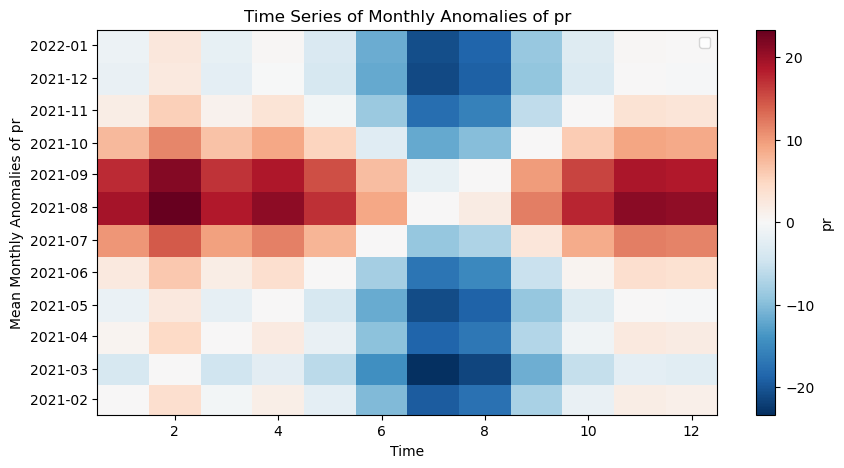

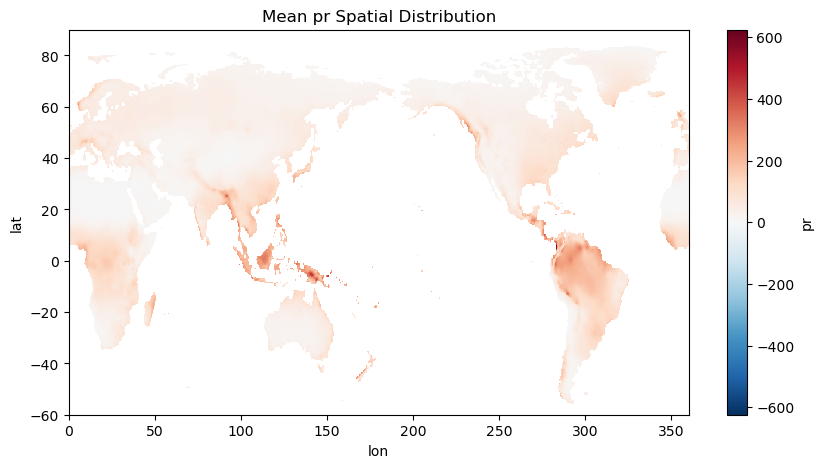

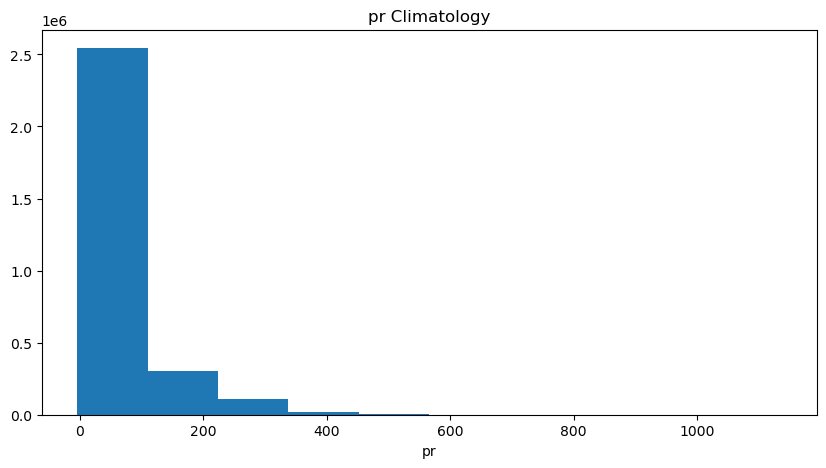

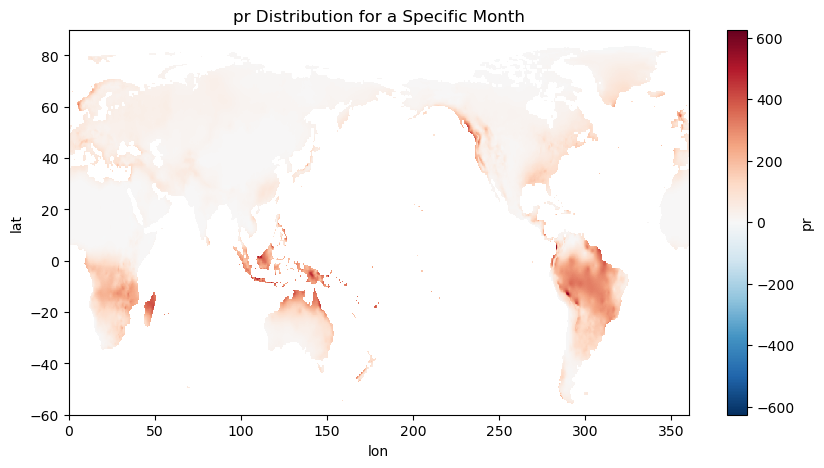

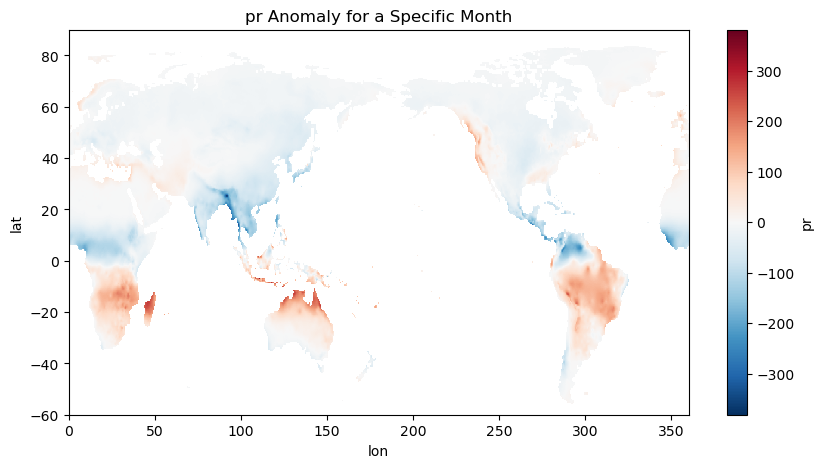

ValueError: array must not contain infs or NaNs

<Figure size 1000x500 with 0 Axes>

In [124]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
file_path = "pr_2021_YM.nc"
data = xr.open_dataset(file_path)

plt.figure(figsize=(10, 5))

# 3.1Calculate the monthly climatology and subtract it from the data
climatology = pr_variable.groupby('time.month').mean('time')
anomalies = pr_variable - climatology

anomalies.mean(dim=('lat', 'lon')).plot(label=f'Monthly Anomalies of {variable_name}')
plt.title(f'Time Series of Monthly Anomalies of {variable_name}')
plt.xlabel('Time')
plt.ylabel(f'Mean Monthly Anomalies of {variable_name}')
plt.legend()
plt.show()

# 3.2 Make at least 5 different plots using the dataset
plt.figure(figsize=(10, 5))
pr_variable.mean(dim='time').plot()
plt.title(f'Mean {variable_name} Spatial Distribution')
plt.show()
plt.figure(figsize=(10, 5))
pr_variable.groupby('time.month').mean(dim='time').plot()
plt.title(f'{variable_name} Climatology')
plt.show()

# Plot 3: Precipitation distribution across latitudes for a specific month
plt.figure(figsize=(10, 5))
pr_variable.isel(time=0).plot(y='lat')
plt.title(f'{variable_name} Distribution for a Specific Month')
plt.show()

# Plot 4: Precipitation anomaly for a specific month
plt.figure(figsize=(10, 5))
(pr_variable.isel(time=0) - pr_variable.mean(dim='time')).plot()
plt.title(f'{variable_name} Anomaly for a Specific Month')
plt.show()

# Plot 5: 2D histogram of detrended precipitation values
plt.figure(figsize=(10, 5))

detrended_data = signal.detrend(pr_variable, axis=0)

plt.hist2d(lon_flat, lat_flat, weights=detrended_data.mean(dim='time').values.flatten(), bins=(50, 50), cmap='viridis')
plt.colorbar(label=f'Mean Detrended {variable_name}')
plt.title(f'2D Histogram of Mean Detrended {variable_name} Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
